# This is where we use the Algorithms

In [1]:
# TODO: Write a guide on what you need, https://anaconda.org/anaconda/gensim <---- Gensim
#       What does the error message mean?

import pandas as pd              # pandas is a dataframe library
import matplotlib.pyplot as plt  # matplotlib.pyplot plots data
import numpy as np               # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

### Algorithms ###
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import train_test_split # Used to split data into Training set and Test Set

C:\Users\vikander\AppData\Local\Continuum\Anaconda33\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Loading Files

In [2]:
# Load the post data
#df = pd.read_csv("../alteredData.csv")
#df = pd.read_csv("../alteredData100k.csv")
df = pd.read_csv("../alteredData1M.csv")
#df1 = pd.read_csv("../data.csv")

## Preprocessing with a Custom Hot One Encoding

In [3]:
# http://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python <--- This is dank stuff

#TODO:
# Concider changing this to Word Embedding instead (Gensim)
# Concider to add new information instead of re-reading everything
# Should be saved into three different file?

#from sklearn.feature_extraction import DictVectorizer
#dictVector = DictVectorizer(sparse = False, sort = False)
#qualitative_features = ['Name', 'Street', 'City']
#X_qual = dictVector.fit_transform(df[qualitative_features].to_dict('records'))
# Print the List
#dictVector.vocabulary_

In [4]:
# Sanity Check
#df.ix[[0, 33, 39, 55]]

In [5]:
# Debug #
#df.loc[df['Name'] == 7]
#df1.head()

In [6]:
#df.head()

In [7]:
# Change all missing values to 'missing'

df['Name']     = df['Name'].fillna('missing')
df['Street']   = df['Street'].fillna('missing')
df['StreetNr'] = df['StreetNr'].fillna(-1)
df['Zip Code'] = df['Zip Code'].fillna(-1)
df['City']     = df['City'].fillna('missing')
df.loc[df['Legitimate'] == False]

,Name,Street,StreetNr,Zip Code,City,Legitimate
1,missing,Almstigen,64,75165.0,Uppsala,False
2,Heriberto Mcguffie,missing,21,9714.0,Lulea,False
10,missing,Krokiusgatan,23,35174.0,Vaxjo,False
16,Myong Lofthouse,missing,4,80114.0,Gavle,False
24,missing,missing,23,22175.0,Lund,False
27,Detra Trainer,missing,27,11124.0,Stockholm,False
29,missing,Alegatan,39,25125.0,Helsingborg,False
40,Sabrina Mease,Betesbacken,18,8517.0,Sundsvall,False
43,Tiffaney Irvine,missing,57,55157.0,Jonkoping,False
49,missing,Odensbergsgatan,6,70178.0,Orebro,False


In [8]:
#Check for null values
df.isnull().values.any()

False

In [9]:
# Shows the RowsxColumns
df.shape

(1000000, 6)

In [10]:
# This is a simple encoder which replaces Strings with a number

# TODO:
# Should save the corresponding number to the corresponding string in a file

from sklearn.preprocessing import LabelEncoder

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+ feature)
        return df
    
dummyEncode(df)


# Chane True/False to 1/0
correctAdress = {True : 1, False : 0}
df['Legitimate'] = df['Legitimate'].map(correctAdress)

df.select_dtypes

df.head()

,Name,Street,StreetNr,Zip Code,City,Legitimate
0,78,21,44,70178.0,14,1
1,100,7,64,75165.0,18,0
2,46,24,21,9714.0,10,0
3,36,16,84,80114.0,2,1
4,68,16,51,80114.0,2,1


### Check True/False Ratio

In [11]:
num_true = len(df.loc[df['Legitimate'] == True])
num_false = len(df.loc[df['Legitimate'] == False])

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))

Number of True cases: 815576 (81.56%)
Number of False cases: 184424 (18.44%)


### Split Data

In [12]:
# Divides the Train data and Test data into a 70/30 split

#X_train = pd.get_dummies(df)
#X_test = pd.get_dummies(df)

feature_col_names = ['Name', 'City', 'Street', 'StreetNr', 'Zip Code']
prediction_class_name = ['Legitimate']

#ddf = pd.get_dummies(df)

X = df[feature_col_names].values     # predictor feature columnd (8 X m)
y = df[prediction_class_name].values # predicted calss (1 = true, 0 = false) column (1 X m)
split_test_size = 0.70

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42) # 42 is the answer to everything

In [13]:
#Print to check if the split was to our liking

print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

30.00% in training set
70.00% in test set


### Verifying predicted value was split correctly

In [14]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Legitimate'] == 1]), len(df.loc[df['Legitimate'] == 1]) / len(df.index) * 100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Legitimate'] == 0]), len(df.loc[df['Legitimate'] == 0]) / len(df.index) * 100))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 1]) / len(y_train) * 100))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), len(y_train[y_train[:] == 0]) / len(y_train) * 100))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1]) / len(y_test) * 100))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), len(y_test[y_test[:] == 0]) / len(y_test) * 100))

Original True  : 815576 (81.56%)
Original False : 184424 (18.44%)

Training True  : 244686 (81.56%)
Training False : 55314 (18.44%)

Test True      : 570890 (81.56%)
Test False     : 129110 (18.44%)


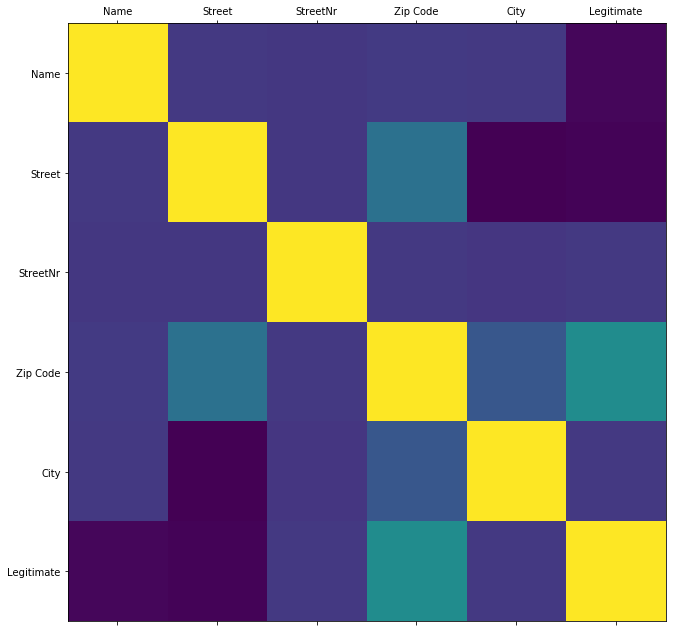

In [15]:
def plot_corr(df, size=11):
    # data frame correlation function
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    
    # color code the rectangles by correlation value
    ax.matshow(corr)
    
    # draw x tick marks
    plt.xticks(range(len(corr.columns)), corr.columns)
    # draw y tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

In [16]:
df.corr()

,Name,Street,StreetNr,Zip Code,City,Legitimate
Name,1.000000,0.003008,-0.003207,0.003871,-0.001043,-0.175430
Street,0.003008,1.000000,-0.004524,0.248140,-0.198197,-0.185839
StreetNr,-0.003207,-0.004524,1.000000,-0.001585,-0.006309,0.000284
Zip Code,0.003871,0.248140,-0.001585,1.000000,0.128442,0.384404
City,-0.001043,-0.198197,-0.006309,0.128442,1.000000,-0.000985
Legitimate,-0.175430,-0.185839,0.000284,0.384404,-0.000985,1.000000


## Random Forest Test

In [17]:
from sklearn import metrics

rf_model = RandomForestClassifier(random_state = 42) # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [18]:
rf_predict_train = rf_model.predict(X_train)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy 1.0000


In [19]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy 1.0000


In [20]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1, 0]))


#[[True-Positive, False-Negative]
#[False-Positive, True-Negative]]

Confusion Matrix
[[570890      0]
 [     0 129110]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00    570890
          0       1.00      1.00      1.00    129110

avg / total       1.00      1.00      1.00    700000



## Naive Bayers

In [21]:
from sklearn.preprocessing import Imputer

fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

X_train = fill_0.fit_transform(X_train)
X_test  = fill_0.fit_transform(X_test)

In [22]:
# Training Bayers

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [23]:
# Performance on Training Data
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.8755



In [24]:
# predict values using the training data
nb_predict_test = nb_model.predict(X_test)

# trainint metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.8753



In [25]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[570275    615]
 [ 86696  42414]]

Classification Report
             precision    recall  f1-score   support

          1       0.87      1.00      0.93    570890
          0       0.99      0.33      0.49    129110

avg / total       0.89      0.88      0.85    700000



### Logistic Regression

In [26]:
lr_model = LogisticRegression(C = 0.7, random_state = 42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lr_predict_train = lr_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
print("")

Accuracy: 0.8970



In [28]:
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("")

Accuracy: 0.8975



In [29]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1, 0]))

Confusion Matrix
[[557218  13672]
 [ 58096  71014]]

Classification Report
             precision    recall  f1-score   support

          1       0.91      0.98      0.94    570890
          0       0.84      0.55      0.66    129110

avg / total       0.89      0.90      0.89    700000



### Logistic CV

In [30]:
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs = 3, cv = 10, refit = True)
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [31]:
lr_cv_predict_train = lr_cv_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))
print("")

Accuracy: 0.8972



In [32]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("")

Accuracy: 0.8973



In [33]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels = [1, 0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels = [1, 0]))

Confusion Matrix
[[557839  13051]
 [ 58858  70252]]

Classification Report
             precision    recall  f1-score   support

          1       0.90      0.98      0.94    570890
          0       0.84      0.54      0.66    129110

avg / total       0.89      0.90      0.89    700000

